In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
#Загрузка может занять около минуты
images, labels = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

In [2]:
import numpy as np #(мне помогли переписать код,но я все понимаю что он из себя представляет и как работает)
def dist(arr, centr):
    return np.vectorize(lambda i: np.argmin(np.apply_along_axis(lambda c: np.linalg.norm(arr[i] - c), 1, centr)))(np.arange(arr.shape[0]))   
def quad_dev(arr, centr, res):
    return sum(np.apply_along_axis(np.linalg.norm, 0, arr - centr[res]))
def findcenter(arr,res,k):
    return np.vectorize(lambda i: np.sum(arr[res == i]) / (arr[res == i].shape[0]))(np.arange(k))

def kmeans(arr, k, iter, eps = 0.001):
    centr = arr[np.random.randint(0, arr.shape[0], k)]
    for i in range(0, iter):  
      res = dist(arr, centr)
      d1 = quad_dev(arr, centr, res)
      d2 = d1
      while abs(d2 - d1) > eps:
          d1 = d2
          centr = findcenter(arr,res,k)
          ResourceWarning = dist(arr, centr)
          d2 = quad_dev(arr, centr, res)
          
    return (centr, d2, res)

In [3]:
model = kmeans(images, 10, 5)
centers = model[0]

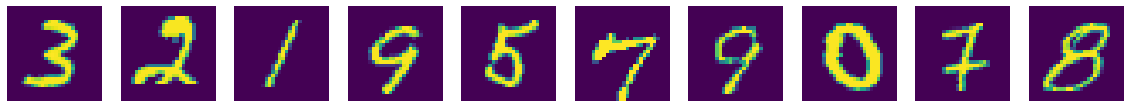

In [4]:
fig, axes = plt.subplots(1, 10, figsize=(20, 6))

for i, ax in enumerate(axes):
    ax.imshow(centers[i].reshape(28, 28))
    ax.axis('off')

In [5]:
translate = dict(zip(np.arange(10), [3, 2, 1, 9, 5, 7, 9, 0, 7, 8]))
label = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
new_labels = np.array([translate[i] for i in range(0, 10)])
print(new_labels)

[3 2 1 9 5 7 9 0 7 8]


In [6]:
new_lab = model[2]
sum = 0
for i in range(0, 70000):
  if(new_lab[i] == int(labels[i])):
    sum = sum + 1
print(sum)

4253
